C:\Users\virgi\AppData\Local\Temp\ipykernel_25016\341511350.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace(categories, inplace=True)
C:\Users\virgi\AppData\Local\Temp\ipykernel_25016\341511350.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace(categories, inplace=True)


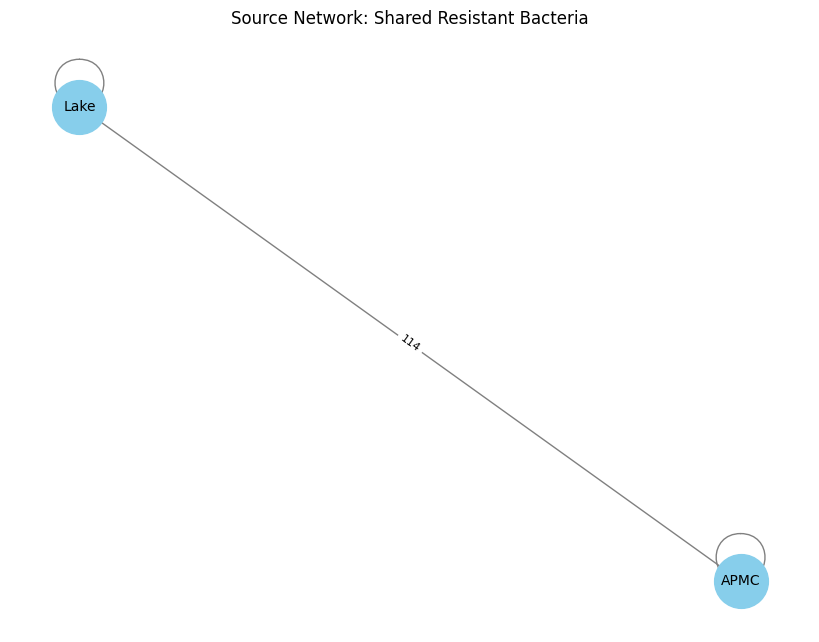

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data
df1 = pd.read_excel('p1.xlsx')
df2 = pd.read_excel('p2.xlsx')

# Define relevant columns
df_columns = ["Source", "Organism", "AMP", "AMO", "CFT", "CFX", "CFL", "CFP", "CFA", "CFO", "CFI", "CFZ", 
              "IME", "AMI", "GEN", "NEO", "ENR", "MAR", "PRA", "DOX", "TET", "NIT", "CHL", "TR/SL"]

# Convert categorical values to numerical (Susceptible=0, Intermediate=1, Resistant=2)
categories = {"S": 0, "I": 1, "*I": 1, "R": 2, "*R": 2}
df1.replace(categories, inplace=True)
df2.replace(categories, inplace=True)

# Drop the "NLA" column if it exists
df1.drop(columns=["NLA"], inplace=True, errors="ignore")
df2.drop(columns=["NLA"], inplace=True, errors="ignore")

# Handle missing values with mode
df1.fillna(df1.mode().iloc[0], inplace=True)
df2.fillna(df2.mode().iloc[0], inplace=True)

# Merge the datasets
df_merged = pd.concat([df1, df2], ignore_index=True)

# Keep only relevant columns
df = df_merged[df_columns]

# Filter only resistant bacteria (Resistance = 2)
resistant_data = df[(df[["AMP", "AMO", "CFT", "CFX", "CFL", "CFP", "CFA", "CFO", "CFI", "CFZ",
                         "IME", "AMI", "GEN", "NEO", "ENR", "MAR", "PRA", "DOX", "TET", "NIT", "CHL", "TR/SL"]]
                     ==2).any(axis=1)]

# Initialize an empty graph
G = nx.Graph()

# Group by "Organism" and list sources that share the same resistant bacteria
grouped = resistant_data.groupby("Organism")["Source"].apply(list)

# Add edges between sources that share resistant bacteria
for sources in grouped:
    for i in range(len(sources)):
        for j in range(i + 1, len(sources)):
            if G.has_edge(sources[i], sources[j]):
                G[sources[i]][sources[j]]['weight'] += 1  # Increment weight if already connected
            else:
                G.add_edge(sources[i], sources[j], weight=1)  # New connection

# Check if the graph has edges before plotting
if len(G.edges) > 0:
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    
    # Draw the network
    edges = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=1500, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edges, font_size=8)

    plt.title("Source Network: Shared Resistant Bacteria")
    plt.show()
else:
    print("No connections found between sources.")


In [2]:
print(df["Source"].unique())


['APMC' 'Lake']


In [3]:
print(resistant_data.shape)


(79, 24)


In [4]:
print(df["Organism"].unique())

['Enterobacter cloacae complex' 'Klebsiella pneumoniae spp pneumoniae'
 'Escherichia coli' 'Staphylococcus aureus'
 'Klibsiella pneumoniae ssp pneumoniae' 'Pseudomonas aeruginosa'
 'Salmonella enterica spp diarizonae' 'Acinetobacter baumanii complex'
 'Klebsiella pneumoniae ssp pneumoniae' 'Enterobacter aerogenes']


In [8]:
grouped

Organism
Acinetobacter baumanii complex                                                     [APMC]
Enterobacter aerogenes                                                       [Lake, Lake]
Enterobacter cloacae complex            [APMC, APMC, APMC, APMC, APMC, APMC, APMC, Lak...
Escherichia coli                        [APMC, APMC, APMC, APMC, APMC, Lake, Lake, Lak...
Klebsiella pneumoniae spp pneumoniae                                         [APMC, APMC]
Klebsiella pneumoniae ssp pneumoniae    [Lake, Lake, Lake, Lake, Lake, Lake, Lake, Lak...
Klibsiella pneumoniae ssp pneumoniae    [APMC, APMC, APMC, APMC, APMC, APMC, APMC, APM...
Pseudomonas aeruginosa                                                       [APMC, APMC]
Salmonella enterica spp diarizonae                                     [APMC, Lake, Lake]
Staphylococcus aureus                                [APMC, APMC, APMC, APMC, APMC, APMC]
Name: Source, dtype: object

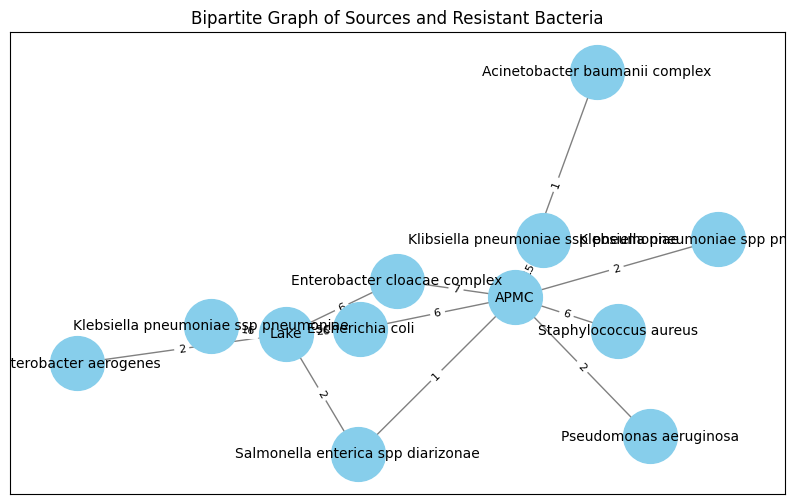

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize bipartite graph
G = nx.Graph()

# Group by "Organism" and list sources that contain them
grouped = df.groupby("Organism")["Source"].apply(list)

# Add nodes
for org, sources in grouped.items():
    G.add_node(org, bipartite=1)  # Bacteria as one node type
    for src in sources:
        G.add_node(src, bipartite=0)  # Source as another node type
        if G.has_edge(src, org):
            G[src][org]['weight'] += 1  # Increment weight if already connected
        else:
            G.add_edge(src, org, weight=1)  # New connection

# Draw the network
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # Compute layout

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=1500)
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edges
edges = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, pos, edge_color="gray")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edges, font_size=8)

plt.title("Bipartite Graph of Sources and Resistant Bacteria")
plt.show()


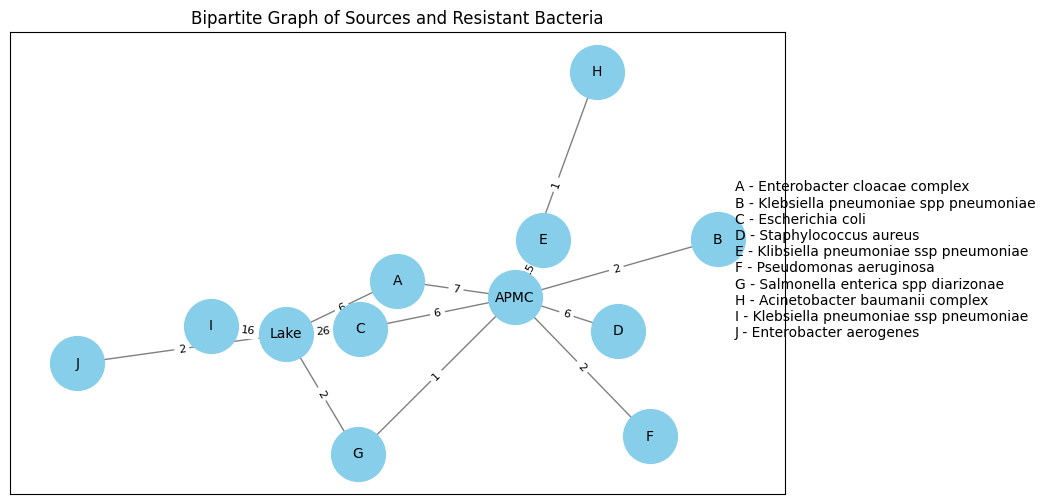

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize bipartite graph
G = nx.Graph()

# Assign unique letters to bacteria
bacteria = df["Organism"].unique()
bacteria_labels = {bacteria[i]: chr(65 + i) for i in range(len(bacteria))}  # 'A', 'B', 'C', ...

# Group by "Organism" and list sources that contain them
grouped = df.groupby("Organism")["Source"].apply(list)

# Add nodes and edges
for org, sources in grouped.items():
    org_label = bacteria_labels[org]  # Use letter instead of full name
    G.add_node(org_label, bipartite=1)  # Bacteria as one node type

    for src in sources:
        G.add_node(src, bipartite=0)  # Source as another node type
        if G.has_edge(src, org_label):
            G[src][org_label]['weight'] += 1  # Increment weight if already connected
        else:
            G.add_edge(src, org_label, weight=1)  # New connection

# Draw the network
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # Compute layout

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=1500)
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edges
edges = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, pos, edge_color="gray")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edges, font_size=8)

# Create legend for bacteria mapping
legend_labels = [f"{bacteria_labels[b]} - {b}" for b in bacteria]
legend_text = "\n".join(legend_labels)

# Add legend outside the plot
plt.gcf().text(0.85, 0.5, legend_text, fontsize=10, verticalalignment="center")

plt.title("Bipartite Graph of Sources and Resistant Bacteria")
plt.show()
